## Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Collecting Data

In [ ]:
capaian_sampah = pd.read_csv('https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/Data_Capaian_SIPSN_KLHK.csv', skiprows=1)
sampah_laut_item = pd.read_csv('https://raw.githubusercontent.com/ihsankurn/Final-Project-PZSIB/main/ocean-waste-by-item.csv')

## Cleansing

### capaian_sampah

In [ ]:
capaian_sampah

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Tahunan (ton/tahun)(A),Pengurangan Sampah Tahunan (ton/tahun)(B),%Pengurangan Sampah(B/A),Penanganan Sampah Tahunan (ton/tahun)(C),%Penanganan Sampah(C/A),Sampah Terkelola Tahunan (ton/tahun)(B+C),%Sampah Terkelola(B+C)/A,Daur ulang Sampah Tahunan (ton/tahun)(D),Bahan baku Sampah Tahunan (ton/tahun)(E),Recycling Rate(D+E)/A,P1/P2
0,2022,Aceh,Kab. Aceh Selatan,35217.68,45.36,0.13,12775.00,36.27,12820.36,36.40,0.00,NaN,0.00,P 2
1,2022,Aceh,Kab. Aceh Tenggara,33332.97,0.00,0.00,10406.88,31.22,10406.88,31.22,NaN,NaN,0.00,P 2
2,2022,Aceh,Kab. Aceh Timur,63195.95,3610.21,5.71,17550.61,27.77,21160.82,33.48,857.75,NaN,1.36,P 2
3,2022,Aceh,Kab. Aceh Barat,37021.59,5663.02,15.30,26354.46,71.19,32017.48,86.48,1423.50,NaN,3.85,P 2
4,2022,Aceh,Kab. Pidie,64897.73,8533.10,13.15,24087.37,37.12,32620.47,50.26,8533.10,NaN,13.15,P 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2019,Papua,Kab. Biak Numfor,21232.05,3860.53,18.18,16986.66,80.00,20847.19,98.19,3123.72,NaN,14.71,P 2
1034,2019,Papua,Kota Jayapura,92211.70,7804.73,8.46,67525.00,73.23,75329.73,81.69,4379.55,NaN,4.75,P 2
1035,2019,Papua Selatan,Kab. Asmat,14233.54,109.50,0.77,2007.50,14.10,2117.00,14.87,NaN,NaN,0.00,P 2
1036,2019,Papua Barat Daya,Kab. Raja Ampat,12090.99,54.78,0.45,547.50,4.53,602.28,4.98,51.06,547.5,4.95,P 2


In [ ]:
capaian_sampah = capaian_sampah.rename(columns ={
    '%Pengurangan Sampah(B/A)' : 'Pengurangan Sampah(B/A)',
    '%Penanganan Sampah(C/A)' : 'Penanganan Sampah(C/A)',
    '%Sampah Terkelola(B+C)/A' : 'Sampah Terkelola(B+C)/A'
})
capaian_sampah.head()

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Tahunan (ton/tahun)(A),Pengurangan Sampah Tahunan (ton/tahun)(B),Pengurangan Sampah(B/A),Penanganan Sampah Tahunan (ton/tahun)(C),Penanganan Sampah(C/A),Sampah Terkelola Tahunan (ton/tahun)(B+C),Sampah Terkelola(B+C)/A,Daur ulang Sampah Tahunan (ton/tahun)(D),Bahan baku Sampah Tahunan (ton/tahun)(E),Recycling Rate(D+E)/A,P1/P2
0,2022,Aceh,Kab. Aceh Selatan,35217.68,45.36,0.13,12775.00,36.27,12820.36,36.40,0.00,NaN,0.00,P 2
1,2022,Aceh,Kab. Aceh Tenggara,33332.97,0.00,0.00,10406.88,31.22,10406.88,31.22,NaN,NaN,0.00,P 2
2,2022,Aceh,Kab. Aceh Timur,63195.95,3610.21,5.71,17550.61,27.77,21160.82,33.48,857.75,NaN,1.36,P 2
3,2022,Aceh,Kab. Aceh Barat,37021.59,5663.02,15.30,26354.46,71.19,32017.48,86.48,1423.50,NaN,3.85,P 2
4,2022,Aceh,Kab. Pidie,64897.73,8533.10,13.15,24087.37,37.12,32620.47,50.26,8533.10,NaN,13.15,P 2


In [ ]:
capaian_sampah['Tahun'].unique()

array([2022, 2021, 2020, 2019, 2018])

In [ ]:
capaian_sampah.isnull().sum()

Tahun                                          0
Provinsi                                       0
Kabupaten/Kota                                 0
Timbulan Sampah Tahunan (ton/tahun)(A)         0
Pengurangan Sampah Tahunan (ton/tahun)(B)     25
Pengurangan Sampah(B/A)                       25
Penanganan Sampah Tahunan (ton/tahun)(C)       7
Penanganan Sampah(C/A)                         7
Sampah Terkelola Tahunan (ton/tahun)(B+C)      0
Sampah Terkelola(B+C)/A                        0
Daur ulang Sampah Tahunan (ton/tahun)(D)     120
Bahan baku Sampah Tahunan (ton/tahun)(E)     497
Recycling Rate(D+E)/A                          0
P1/P2                                          0
dtype: int64

In [ ]:
# Handle missing values
capaian_sampah.fillna(value = 0, inplace = True)

In [ ]:
capaian_sampah.isnull().sum()

Tahun                                        0
Provinsi                                     0
Kabupaten/Kota                               0
Timbulan Sampah Tahunan (ton/tahun)(A)       0
Pengurangan Sampah Tahunan (ton/tahun)(B)    0
Pengurangan Sampah(B/A)                      0
Penanganan Sampah Tahunan (ton/tahun)(C)     0
Penanganan Sampah(C/A)                       0
Sampah Terkelola Tahunan (ton/tahun)(B+C)    0
Sampah Terkelola(B+C)/A                      0
Daur ulang Sampah Tahunan (ton/tahun)(D)     0
Bahan baku Sampah Tahunan (ton/tahun)(E)     0
Recycling Rate(D+E)/A                        0
P1/P2                                        0
dtype: int64

### sampah_laut_item

In [ ]:
sampah_laut_item

,Entity,Code,Year,River Waters,Riverbed,Shoreline,Nearshore Waters,Offshore Waters,Deep Seafloor
0,Batteries,NaN,2021,NaN,6.1,NaN,NaN,NaN,NaN
1,Cans (drink),NaN,2021,NaN,NaN,NaN,NaN,NaN,10.2
2,Cans (food),NaN,2021,NaN,4.0,NaN,NaN,NaN,NaN
3,Clothing,NaN,2021,NaN,NaN,3.9,NaN,NaN,2.2
4,Cotton buds,NaN,2021,0.7,NaN,NaN,NaN,NaN,NaN
5,Cups & lids,NaN,2021,1.1,NaN,NaN,4.0,1.2,NaN
6,Fishing net,NaN,2021,NaN,NaN,NaN,2.4,4.4,2.3
7,Fishing related,NaN,2021,NaN,7.7,NaN,1.7,24.4,7.2
8,Food containers,NaN,2021,35.8,NaN,15.4,NaN,NaN,7.0
9,Glass bottles,NaN,2021,NaN,11.1,3.8,NaN,NaN,2.8


In [ ]:
# Remove the 'Code' column
sampah_laut_item.drop(['Code'], axis = 1, inplace = True)

# Handle missing values
sampah_laut_item.fillna(value = 0, inplace = True)

sampah_laut_item

,Entity,Year,River Waters,Riverbed,Shoreline,Nearshore Waters,Offshore Waters,Deep Seafloor
0,Batteries,2021,0.0,6.1,0.0,0.0,0.0,0.0
1,Cans (drink),2021,0.0,0.0,0.0,0.0,0.0,10.2
2,Cans (food),2021,0.0,4.0,0.0,0.0,0.0,0.0
3,Clothing,2021,0.0,0.0,3.9,0.0,0.0,2.2
4,Cotton buds,2021,0.7,0.0,0.0,0.0,0.0,0.0
5,Cups & lids,2021,1.1,0.0,0.0,4.0,1.2,0.0
6,Fishing net,2021,0.0,0.0,0.0,2.4,4.4,2.3
7,Fishing related,2021,0.0,7.7,0.0,1.7,24.4,7.2
8,Food containers,2021,35.8,0.0,15.4,0.0,0.0,7.0
9,Glass bottles,2021,0.0,11.1,3.8,0.0,0.0,2.8


In [ ]:
sampah_laut_item.isnull().sum()

Entity              0
Year                0
River Waters        0
Riverbed            0
Shoreline           0
Nearshore Waters    0
Offshore Waters     0
Deep Seafloor       0
dtype: int64

In [ ]:
capaian_sampah.to_csv('capaian_sampah.csv',index=False)

## Visualization

### Capaian Sampah di Indonesia

In [ ]:
df_sorted_tahun = capaian_sampah.sort_values(by='Tahun')
df_sorted_tahun

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Tahunan (ton/tahun)(A),Pengurangan Sampah Tahunan (ton/tahun)(B),Pengurangan Sampah(B/A),Penanganan Sampah Tahunan (ton/tahun)(C),Penanganan Sampah(C/A),Sampah Terkelola Tahunan (ton/tahun)(B+C),Sampah Terkelola(B+C)/A,Daur ulang Sampah Tahunan (ton/tahun)(D),Bahan baku Sampah Tahunan (ton/tahun)(E),Recycling Rate(D+E)/A,P1/P2
1037,2018,Papua Barat,Kab. Manokwari,54830.04,0.00,0.00,21608.00,39.41,21608.00,39.41,0.00,0.00,0.00,P 2
881,2019,Jawa Tengah,Kab. Kebumen,148386.62,33653.31,22.68,84902.65,57.22,118555.96,79.90,23349.36,7121.15,20.53,P 2
880,2019,Jawa Tengah,Kab. Cilacap,333228.30,41811.06,12.55,211413.41,63.44,253224.47,75.99,382.19,153637.56,46.22,P 2
879,2019,Jawa Barat,Kota Tasikmalaya,106560.83,0.00,0.00,62057.30,58.24,62057.30,58.24,0.00,0.00,0.00,P 2
878,2019,Jawa Barat,Kota Cimahi,99039.08,11695.19,11.81,81526.48,82.32,93221.67,94.13,11396.26,248.28,11.76,P 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2022,Kalimantan Tengah,Kab. Barito Selatan,24439.67,1227.56,5.02,2583.98,10.57,3811.55,15.60,1222.99,0.00,5.00,P 2
210,2022,Kalimantan Tengah,Kab. Barito Utara,22603.87,1455.00,6.44,9168.80,40.56,10623.80,47.00,1455.00,43.80,6.63,P 2
211,2022,Kalimantan Tengah,Kab. Seruyan,29999.35,16.93,0.06,5999.69,20.00,6016.62,20.06,3.65,889.69,2.98,P 2
204,2022,Kalimantan Barat,Kab. Sanggau,89841.83,33.85,0.04,18257.30,20.32,18291.15,20.36,5.38,0.00,0.01,P 2


#### Timbulan Sampah Tahunan

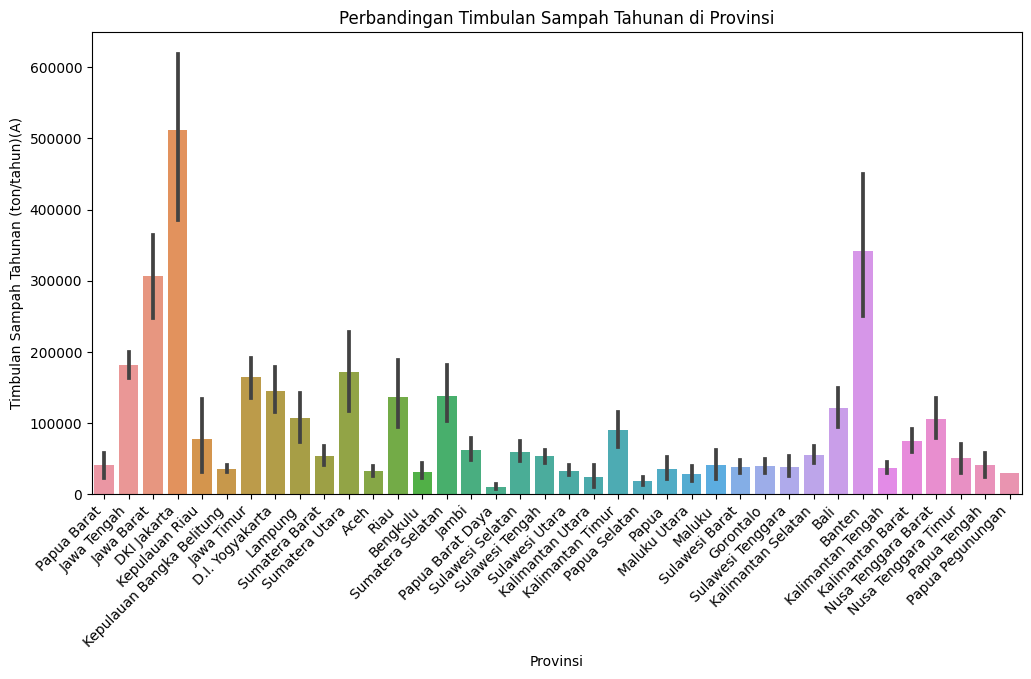

In [ ]:
# Perbandingan Timbulan Sampah Tahunan di Provinsi
plt.figure(figsize=(12, 6))
sns.barplot(x='Provinsi', y='Timbulan Sampah Tahunan (ton/tahun)(A)', data=df_sorted_tahun)
plt.title('Perbandingan Timbulan Sampah Tahunan di Provinsi')
plt.xticks(rotation=45, ha='right')
plt.show()

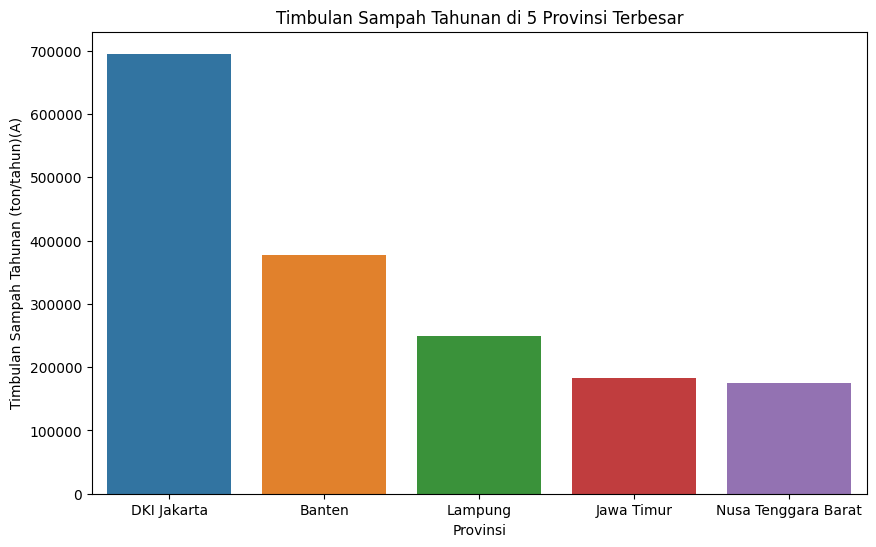

In [ ]:
# Handling potential duplicates and NaN values
df_cleaned = df_sorted_tahun.drop_duplicates(subset='Provinsi').dropna(subset=['Timbulan Sampah Tahunan (ton/tahun)(A)'])

# Sorting the cleaned DataFrame
df_sorted_A = df_cleaned.sort_values(by='Timbulan Sampah Tahunan (ton/tahun)(A)', ascending=False)

# Taking the top 5
top_5_provinsi = df_sorted_A.head(5)

# Perbandingan Timbulan Sampah Tahunan di 5 Provinsi Terbesar
plt.figure(figsize=(10, 6))
sns.barplot(x='Provinsi', y='Timbulan Sampah Tahunan (ton/tahun)(A)', data=top_5_provinsi)
plt.title('Timbulan Sampah Tahunan di 5 Provinsi Terbesar')
plt.show()

Grafik tersebut menunjukkan bahwa DKI Jakarta, Banten, dan Lampung adalah provinsi dengan timbulan sampah tahunan terbesar di Indonesia. Hal ini menunjukkan bahwa ketiga provinsi tersebut memiliki potensi pasar yang besar untuk produk ramah lingkungan.

#### Pengurangan Sampah

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah pengurangan sampah setiap tahun
total_pengurangan_per_tahun = df_sorted_tahun.groupby('Tahun')['Pengurangan Sampah Tahunan (ton/tahun)(B)'].sum().reset_index()
total_pengurangan_per_tahun

,Tahun,Pengurangan Sampah Tahunan (ton/tahun)(B)
0,2018,0.00
1,2019,29025095.30
2,2020,24210447.38
3,2021,10414640.21
4,2022,5388610.13


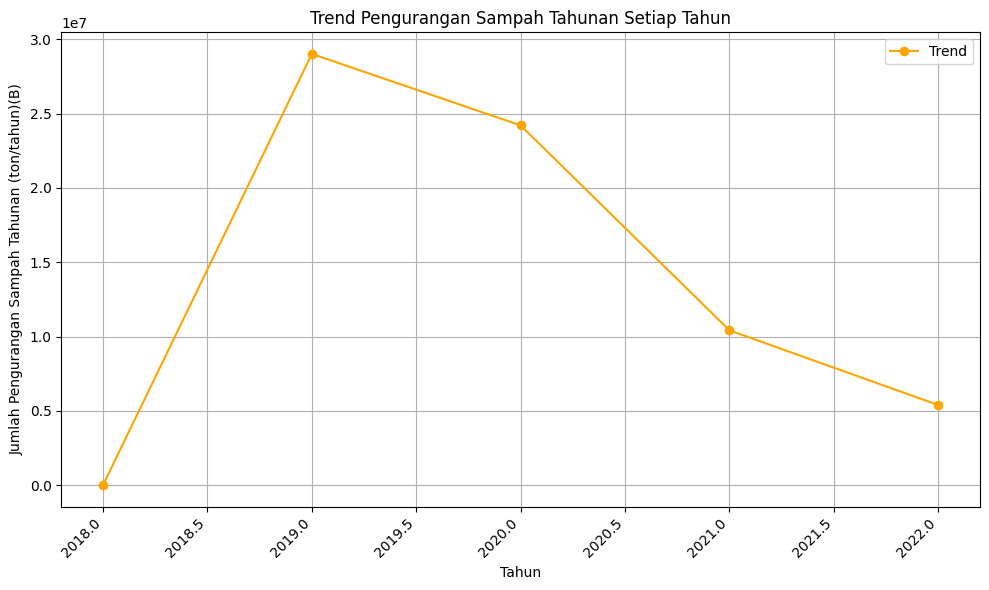

In [ ]:
# Membuat tren grafik (garis plot)
plt.figure(figsize=(10, 6))
plt.plot(total_pengurangan_per_tahun['Tahun'], total_pengurangan_per_tahun['Pengurangan Sampah Tahunan (ton/tahun)(B)'], marker='o', color='orange', label='Trend')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengurangan Sampah Tahunan (ton/tahun)(B)')
plt.title('Trend Pengurangan Sampah Tahunan Setiap Tahun')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Optional: Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()

Trend pengurangan sampah tahunan yang meningkat menunjukkan bahwa masyarakat semakin sadar akan pentingnya menjaga lingkungan. Hal ini dapat menjadi peluang bagi aplikasi ecommerce produk ramah lingkungan untuk berkembang.

Peningkatan jumlah pengurangan sampah tahunan yang signifikan menunjukkan bahwa masyarakat semakin berkomitmen untuk mengurangi sampah. Hal ini juga dapat menjadi peluang bagi aplikasi ecommerce produk ramah lingkungan untuk berkembang.

#### Daur Ulang Sampah

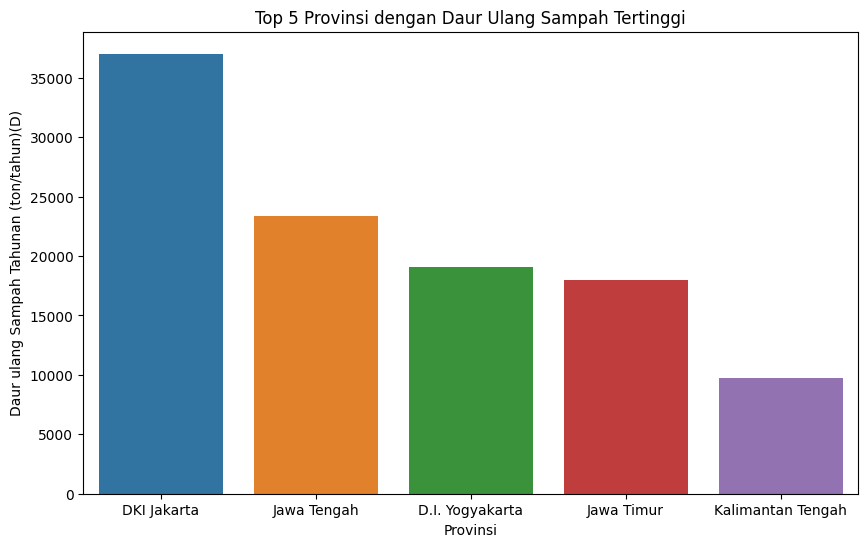

In [ ]:
daur_ulang = df_sorted_tahun.drop_duplicates(subset='Provinsi').dropna(subset=['Daur ulang Sampah Tahunan (ton/tahun)(D)'])

# Menampilkan 5 data terbesar dari kolom 'Daur ulang Sampah Tahunan (ton/tahun)(D)'
top_5_daur_ulang = daur_ulang.nlargest(5, 'Daur ulang Sampah Tahunan (ton/tahun)(D)')

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Provinsi', y='Daur ulang Sampah Tahunan (ton/tahun)(D)', data=top_5_daur_ulang)
plt.title('Top 5 Provinsi dengan Daur Ulang Sampah Tertinggi')
plt.show()

Provinsi DKI Jakarta, Jawa Tengah, DIY, Jawa Timur, dan Kalimantan Tengah merupakan provinsi dengan tingkat daur ulang sampah tertinggi di Indonesia. Hal ini menunjukkan bahwa terdapat kesadaran yang tinggi di kalangan masyarakat di provinsi-provinsi tersebut untuk mengurangi sampah dan melestarikan lingkungan.

Produk-produk ramah lingkungan memiliki potensi yang besar untuk diminati oleh masyarakat di provinsi-provinsi tersebut. Hal ini karena masyarakat di provinsi-provinsi tersebut sudah memiliki kecenderungan untuk memilih produk yang berkelanjutan.

#### Recycling Rate

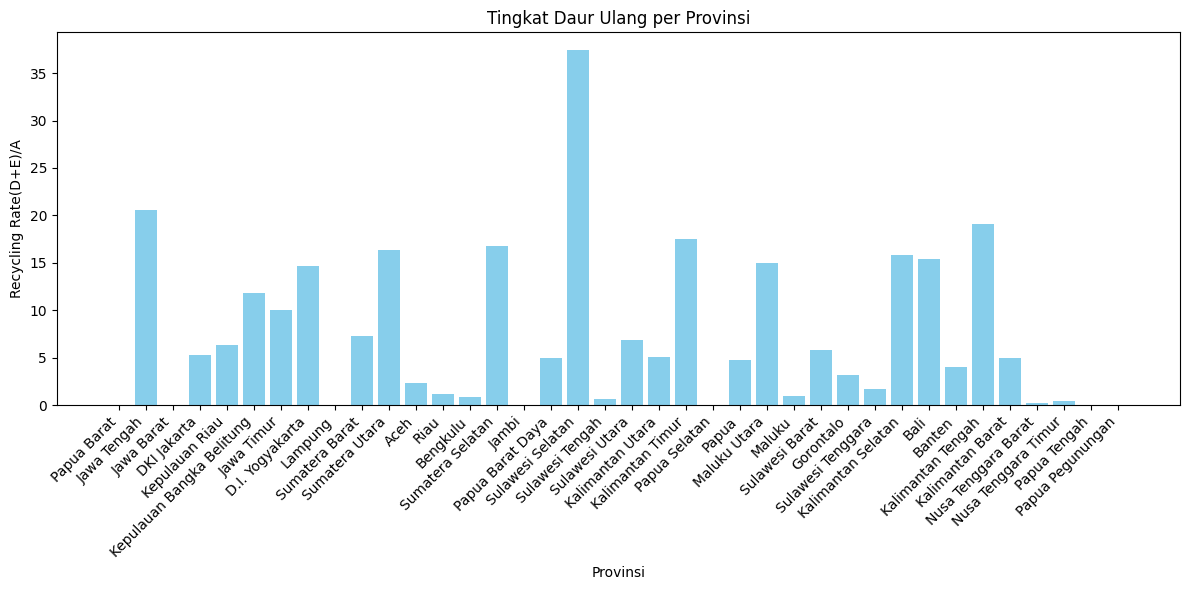

In [ ]:
# Membuat bar plot untuk tingkat daur ulang per provinsi
plt.figure(figsize=(12, 6))
plt.bar(daur_ulang['Provinsi'], daur_ulang['Recycling Rate(D+E)/A'], color='skyblue')
plt.xlabel('Provinsi')
plt.ylabel('Recycling Rate(D+E)/A')
plt.title('Tingkat Daur Ulang per Provinsi')
plt.xticks(rotation=45, ha='right')  # Optional: Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()


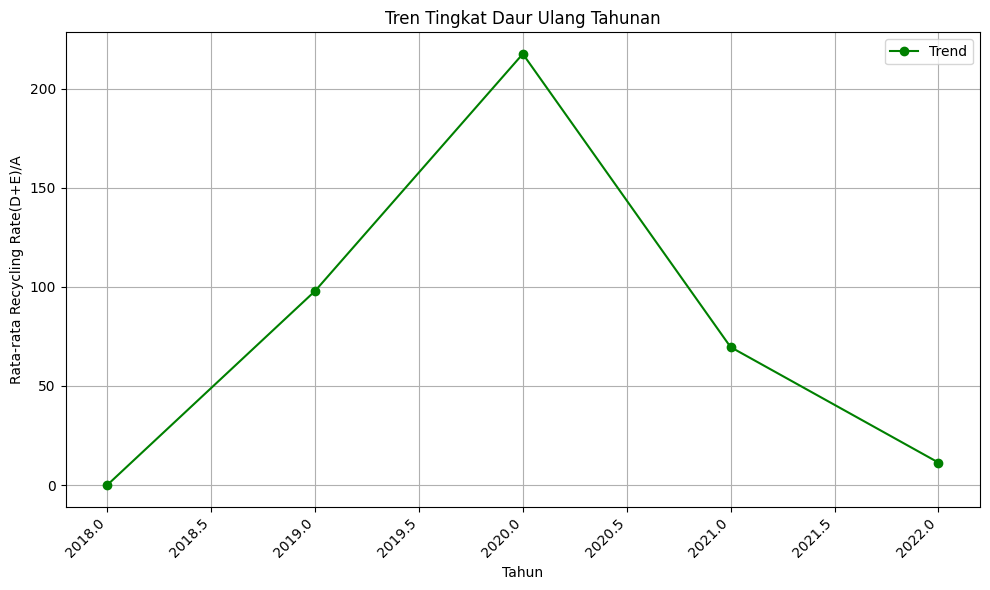

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata tingkat daur ulang setiap tahun
avg_recycling_rate_per_tahun = df_sorted_tahun.groupby('Tahun')['Recycling Rate(D+E)/A'].mean().reset_index()

# Membuat line plot untuk tren tingkat daur ulang
plt.figure(figsize=(10, 6))
plt.plot(avg_recycling_rate_per_tahun['Tahun'], avg_recycling_rate_per_tahun['Recycling Rate(D+E)/A'], marker='o', color='green', label='Trend')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Recycling Rate(D+E)/A')
plt.title('Tren Tingkat Daur Ulang Tahunan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Optional: Untuk memutar label sumbu x agar lebih mudah dibaca
plt.tight_layout()

# Menampilkan plot
plt.show()

### Sampah Laut berdasarkan Item di Dunia

In [ ]:
sampah_laut_item.head()

,Entity,Year,River Waters,Riverbed,Shoreline,Nearshore Waters,Offshore Waters,Deep Seafloor
0,Batteries,2021,0.0,6.1,0.0,0.0,0.0,0.0
1,Cans (drink),2021,0.0,0.0,0.0,0.0,0.0,10.2
2,Cans (food),2021,0.0,4.0,0.0,0.0,0.0,0.0
3,Clothing,2021,0.0,0.0,3.9,0.0,0.0,2.2
4,Cotton buds,2021,0.7,0.0,0.0,0.0,0.0,0.0


In [ ]:
sampah_laut_item

,Entity,Year,River Waters,Riverbed,Shoreline,Nearshore Waters,Offshore Waters,Deep Seafloor
0,Batteries,2021,0.0,6.1,0.0,0.0,0.0,0.0
1,Cans (drink),2021,0.0,0.0,0.0,0.0,0.0,10.2
2,Cans (food),2021,0.0,4.0,0.0,0.0,0.0,0.0
3,Clothing,2021,0.0,0.0,3.9,0.0,0.0,2.2
4,Cotton buds,2021,0.7,0.0,0.0,0.0,0.0,0.0
5,Cups & lids,2021,1.1,0.0,0.0,4.0,1.2,0.0
6,Fishing net,2021,0.0,0.0,0.0,2.4,4.4,2.3
7,Fishing related,2021,0.0,7.7,0.0,1.7,24.4,7.2
8,Food containers,2021,35.8,0.0,15.4,0.0,0.0,7.0
9,Glass bottles,2021,0.0,11.1,3.8,0.0,0.0,2.8


#### River Waters

In [ ]:
# Filter data yang memiliki nilai River Waters tidak sama dengan 0
filtered_data1 = sampah_laut_item[sampah_laut_item['River Waters'] != 0]

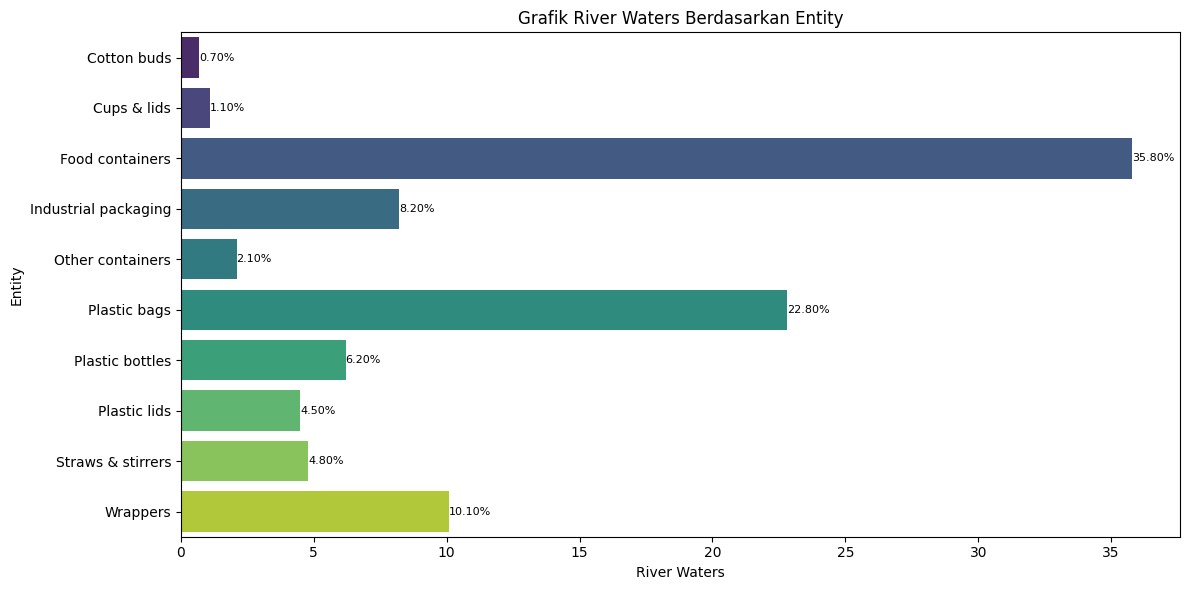

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot1 = sns.barplot(x='River Waters', y='Entity', data=filtered_data1, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot1.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Grafik River Waters Berdasarkan Entity')
plt.xlabel('River Waters')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

Wadah makanan dan kantong platik yang paling umum ditemukan di sungai

#### Riverbed

In [ ]:
# Filter data yang memiliki nilai Riverbed tidak sama dengan 0
filtered_data2 = sampah_laut_item[sampah_laut_item['Riverbed'] != 0]

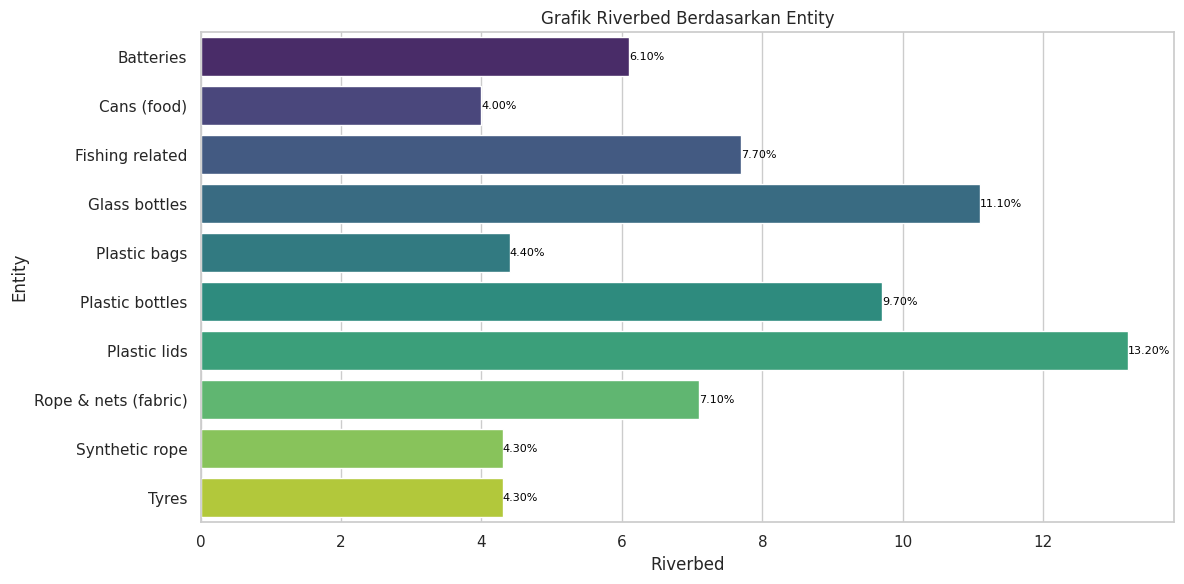

In [ ]:
# Setel gaya seaborn
sns.set(style="whitegrid")

# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot2 = sns.barplot(x='Riverbed', y='Entity', data=filtered_data2, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot2.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Grafik Riverbed Berdasarkan Entity')
plt.xlabel('Riverbed')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

Tutup botol plastik , botol kaca, botol plastik, alat penangkap ikan

#### Shoreline

In [ ]:
# Filter data yang memiliki nilai Shoreline tidak sama dengan 0
filtered_data3 = sampah_laut_item[sampah_laut_item['Shoreline'] != 0]

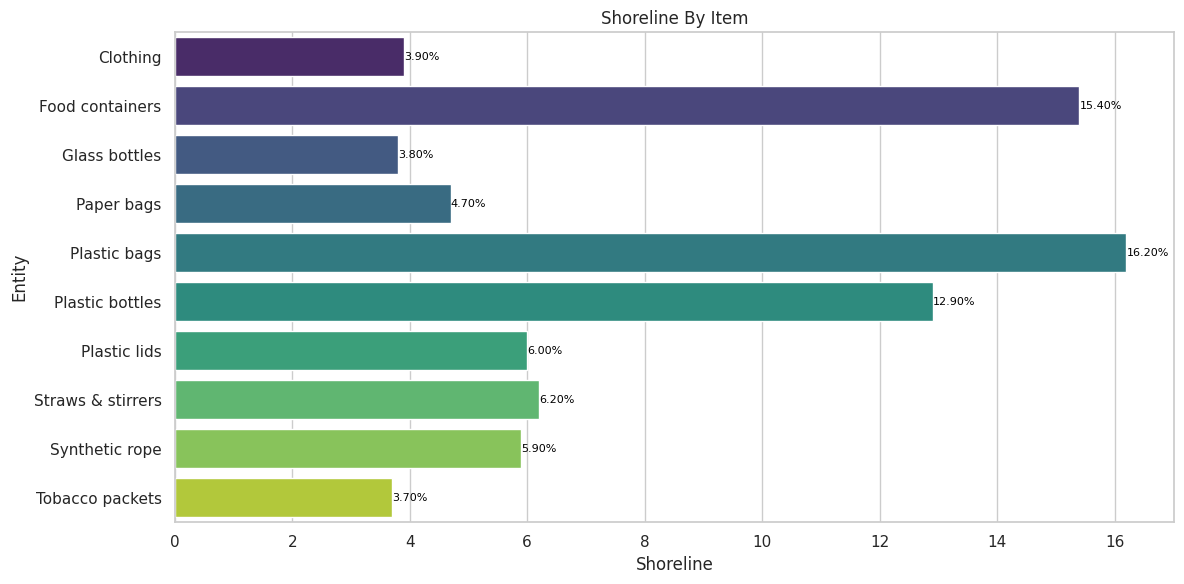

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot3 = sns.barplot(x='Shoreline', y='Entity', data=filtered_data3, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot3.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Shoreline By Item')
plt.xlabel('Shoreline')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()



#### Nearshore Waters

In [ ]:
# Filter data yang memiliki nilai Nearshore Waters tidak sama dengan 0
filtered_data4 = sampah_laut_item[sampah_laut_item['Nearshore Waters'] != 0]

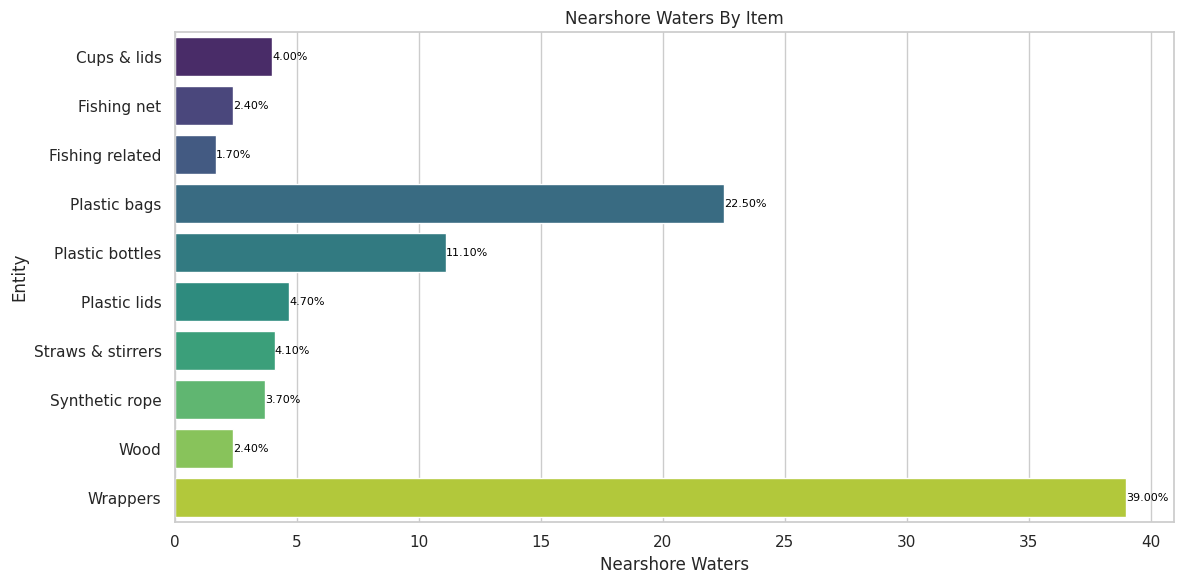

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot4 = sns.barplot(x='Nearshore Waters', y='Entity', data=filtered_data4, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot4.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Nearshore Waters By Item')
plt.xlabel('Nearshore Waters')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Offshore Waters

In [ ]:
# Filter data yang memiliki nilai Offshore Waters tidak sama dengan 0
filtered_data5 = sampah_laut_item[sampah_laut_item['Offshore Waters'] != 0]

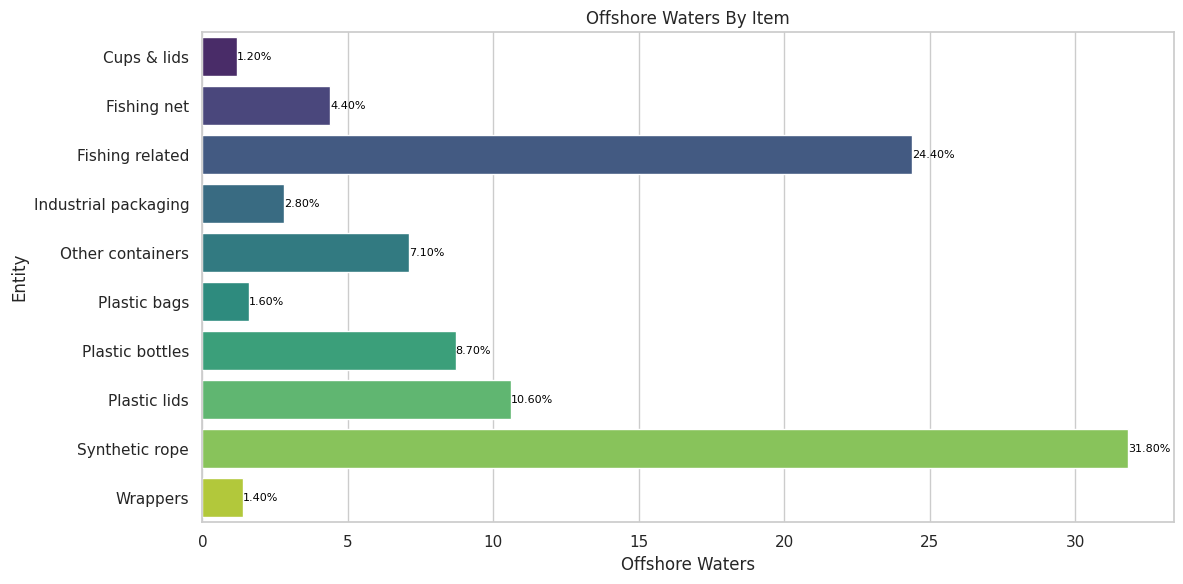

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot5 = sns.barplot(x='Offshore Waters', y='Entity', data=filtered_data5, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot5.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Offshore Waters By Item')
plt.xlabel('Offshore Waters')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Deep Seafloor

In [ ]:
# Filter data yang memiliki nilai Deep Seafloor tidak sama dengan 0
filtered_data6 = sampah_laut_item[sampah_laut_item['Deep Seafloor'] != 0]

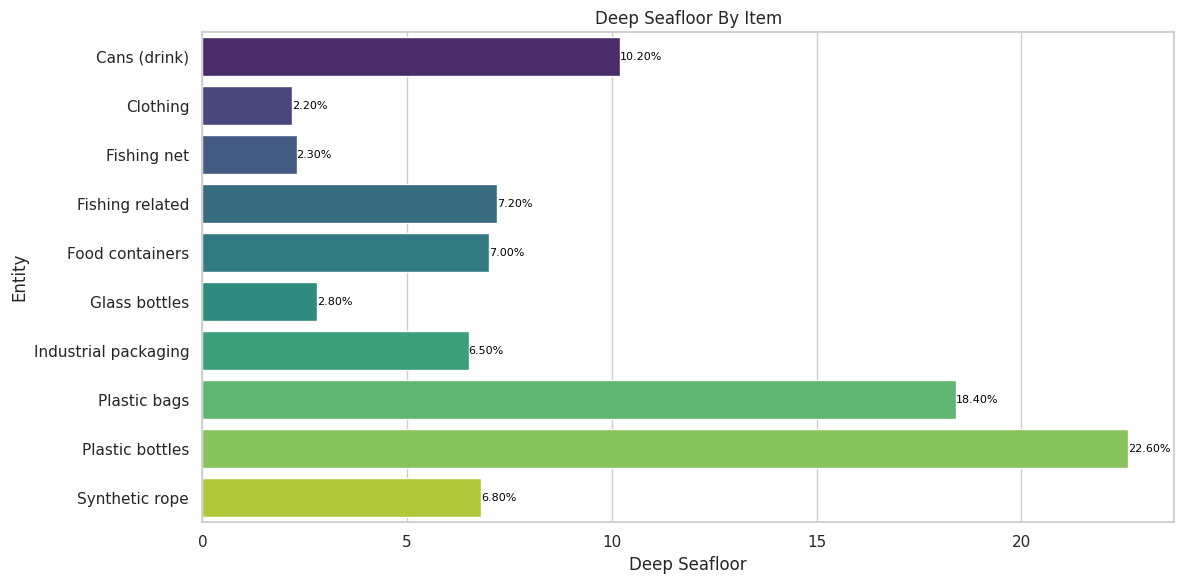

In [ ]:
# Buat plot menggunakan seaborn dengan orientasi horizontal
plt.figure(figsize=(12, 6))
plot6 = sns.barplot(x='Deep Seafloor', y='Entity', data=filtered_data6, palette='viridis', orient='h')

# Tambahkan label persen di setiap bar
for bar in plot6.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
             va='center', ha='left', fontsize=8, color='black')

plt.title('Deep Seafloor By Item')
plt.xlabel('Deep Seafloor')
plt.ylabel('Entity')
plt.tight_layout()

# Tampilkan grafik
plt.show()

#### Gabungan

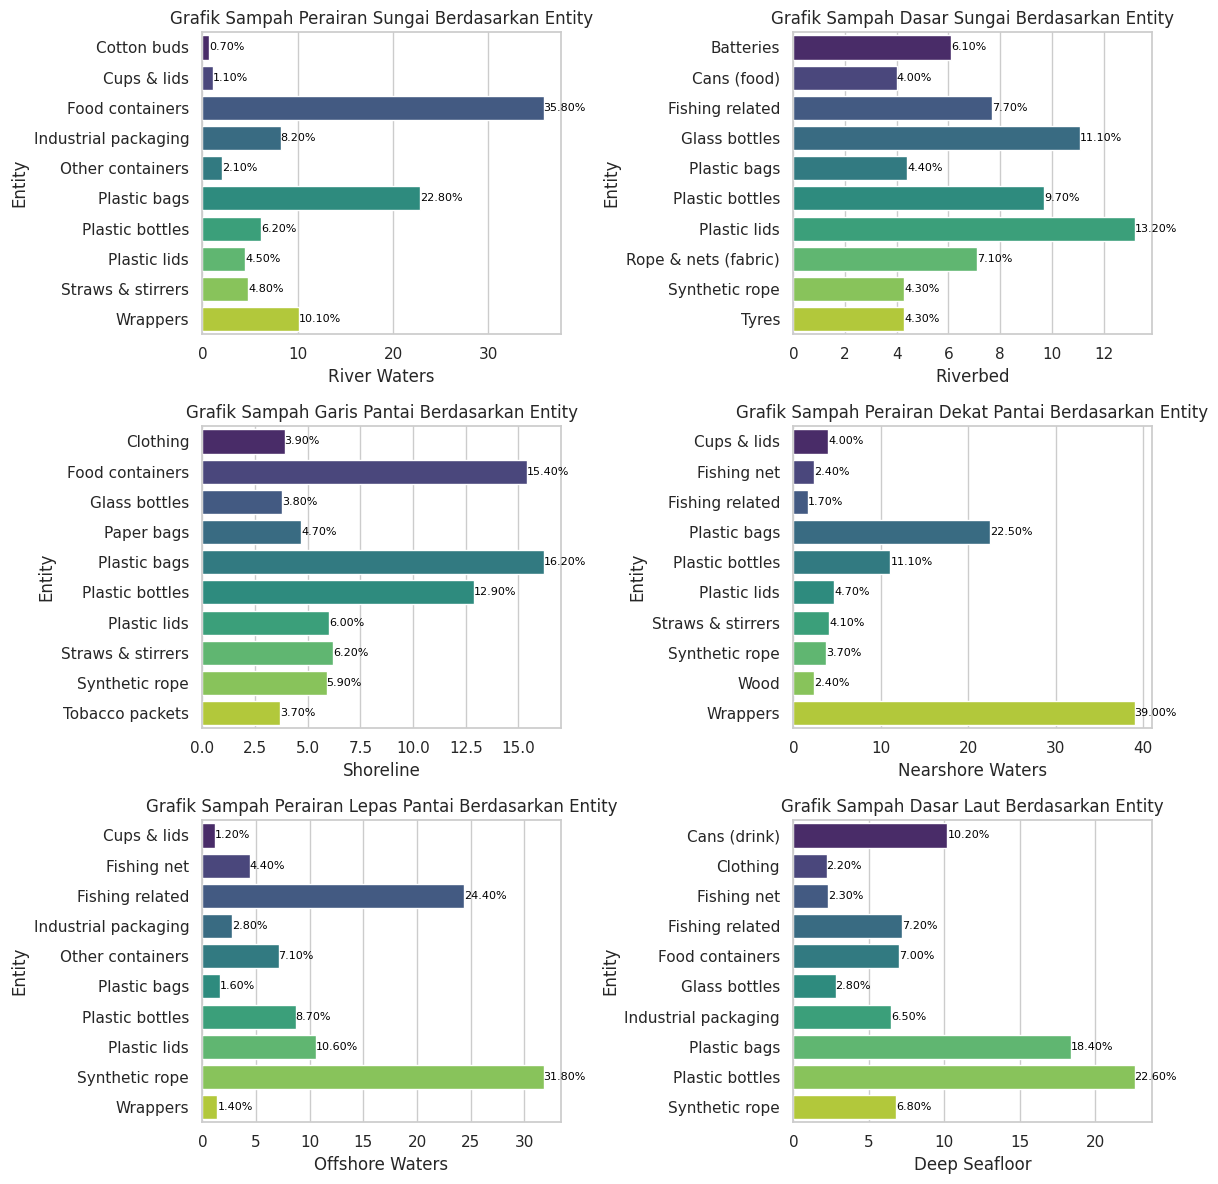

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setel gaya seaborn
sns.set(style="whitegrid")

# Buat figure dan axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot pertama
plot1 = sns.barplot(ax=axes[0, 0], x='River Waters', y='Entity', data=filtered_data1, palette='viridis', orient='h')
for bar in plot1.patches:
    axes[0, 0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[0, 0].set_title('Grafik Sampah Perairan Sungai Berdasarkan Entity')
axes[0, 0].set_xlabel('River Waters')
axes[0, 0].set_ylabel('Entity')

# Plot kedua
plot2 = sns.barplot(ax=axes[0, 1], x='Riverbed', y='Entity', data=filtered_data2, palette='viridis', orient='h')
for bar in plot2.patches:
    axes[0, 1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[0, 1].set_title('Grafik Sampah Dasar Sungai Berdasarkan Entity')
axes[0, 1].set_xlabel('Riverbed')
axes[0, 1].set_ylabel('Entity')

# Plot ketiga
plot3 = sns.barplot(ax=axes[1, 0], x='Shoreline', y='Entity', data=filtered_data3, palette='viridis', orient='h')
for bar in plot3.patches:
    axes[1, 0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[1, 0].set_title('Grafik Sampah Garis Pantai Berdasarkan Entity')
axes[1, 0].set_xlabel('Shoreline')
axes[1, 0].set_ylabel('Entity')

# Plot keempat
plot4 = sns.barplot(ax=axes[1, 1], x='Nearshore Waters', y='Entity', data=filtered_data4, palette='viridis', orient='h')
for bar in plot4.patches:
    axes[1, 1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[1, 1].set_title('Grafik Sampah Perairan Dekat Pantai Berdasarkan Entity')
axes[1, 1].set_xlabel('Nearshore Waters')
axes[1, 1].set_ylabel('Entity')

# Plot kelima
plot5 = sns.barplot(ax=axes[2, 0], x='Offshore Waters', y='Entity', data=filtered_data5, palette='viridis', orient='h')
for bar in plot5.patches:
    axes[2, 0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[2, 0].set_title('Grafik Sampah Perairan Lepas Pantai Berdasarkan Entity')
axes[2, 0].set_xlabel('Offshore Waters')
axes[2, 0].set_ylabel('Entity')

# Plot keenam
plot6 = sns.barplot(ax=axes[2, 1], x='Deep Seafloor', y='Entity', data=filtered_data6, palette='viridis', orient='h')
for bar in plot6.patches:
    axes[2, 1].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%',
                    va='center', ha='left', fontsize=8, color='black')
axes[2, 1].set_title('Grafik Sampah Dasar Laut Berdasarkan Entity')
axes[2, 1].set_xlabel('Deep Seafloor')
axes[2, 1].set_ylabel('Entity')

# Sesuaikan layout
plt.tight_layout()

# Tampilkan grafik
plt.show()
